In [149]:
import sklearn
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
state = 42

In [150]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset Info

In [151]:
bc.target[500]

1

In [152]:
bc.target.shape

(569,)

In [153]:
bc.data[10]

array([1.602e+01, 2.324e+01, 1.027e+02, 7.978e+02, 8.206e-02, 6.669e-02,
       3.299e-02, 3.323e-02, 1.528e-01, 5.697e-02, 3.795e-01, 1.187e+00,
       2.466e+00, 4.051e+01, 4.029e-03, 9.269e-03, 1.101e-02, 7.591e-03,
       1.460e-02, 3.042e-03, 1.919e+01, 3.388e+01, 1.238e+02, 1.150e+03,
       1.181e-01, 1.551e-01, 1.459e-01, 9.975e-02, 2.948e-01, 8.452e-02])

In [154]:
bc.data.shape

(569, 30)

# Preprocessing

In [155]:
from sklearn.model_selection import train_test_split

train_feature, test_feature, train_label, test_label = train_test_split(bc.data, bc.target, test_size=0.2, random_state = state)

In [156]:
print(f"Feature=> train: {train_feature.shape} - test {test_feature.shape}")
print(f"Label=> train: {train_label.shape} - test {test_label.shape}")

Feature=> train: (455, 30) - test (114, 30)
Label=> train: (455,) - test (114,)


In [157]:
train_feature[0]

array([9.029e+00, 1.733e+01, 5.879e+01, 2.505e+02, 1.066e-01, 1.413e-01,
       3.130e-01, 4.375e-02, 2.111e-01, 8.046e-02, 3.274e-01, 1.194e+00,
       1.885e+00, 1.767e+01, 9.549e-03, 8.606e-02, 3.038e-01, 3.322e-02,
       4.197e-02, 9.559e-03, 1.031e+01, 2.265e+01, 6.550e+01, 3.247e+02,
       1.482e-01, 4.365e-01, 1.252e+00, 1.750e-01, 4.228e-01, 1.175e-01])

In [158]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0, 1))

train_feature = scalar.fit_transform(train_feature)
test_feature = scalar.transform(test_feature)

In [159]:
train_feature[0]

array([0.06552721, 0.25769361, 0.07732252, 0.03436883, 0.48722578,
       0.41750565, 0.73336457, 0.21744533, 0.50400427, 0.64237574,
       0.07818215, 0.18427334, 0.05314988, 0.02029892, 0.26637658,
       0.62943491, 0.76717172, 0.62928585, 0.63623129, 0.29933115,
       0.05964476, 0.28331557, 0.05597072, 0.02508436, 0.523195  ,
       0.44938009, 1.        , 0.60137457, 0.52493594, 0.52950153])

# Classification

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def calculate_metrics(train_label, test_label, pred_train_label, pred_test_label):
    
    acc_train = accuracy_score(y_true=train_label, y_pred=pred_train_label)
    acc_test = accuracy_score(y_true=test_label, y_pred=pred_test_label)
    
    p = precision_score(y_true=test_label, y_pred=pred_test_label)
    
    r = recall_score(y_true=test_label, y_pred=pred_test_label)
    
    print(f"acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}")
    
    return acc_train, acc_test, p, r

# 1. Naive Bayes

In [161]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_feature, train_label)

GaussianNB()

In [162]:
pred_train_label = gnb.predict(train_feature)
pred_test_label = gnb.predict(test_feature)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(train_label, test_label, pred_train_label, pred_test_label)

confusion_matrix(test_label, pred_test_label)

acc train: 0.9362637362637363 - acc test: 0.9649122807017544 - precision: 0.958904109589041 - recall: 0.9859154929577465


array([[40,  3],
       [ 1, 70]])

# 2. KNN

In [163]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(train_feature, train_label)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [164]:
pred_train_label = knn.predict(train_feature)
pred_test_label = knn.predict(test_feature)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(train_label, test_label, pred_train_label, pred_test_label)

confusion_matrix(test_label, pred_test_label)

acc train: 0.9736263736263736 - acc test: 0.9649122807017544 - precision: 0.971830985915493 - recall: 0.971830985915493


array([[41,  2],
       [ 2, 69]])

# 3. Decision Tree

In [165]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion='gini', random_state=state)
dt.fit(train_feature, train_label)

DecisionTreeClassifier(max_depth=64, random_state=42)

In [166]:
pred_train_label = dt.predict(train_feature)
pred_test_label = dt.predict(test_feature)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(train_label, test_label, pred_train_label, pred_test_label)

confusion_matrix(test_label, pred_test_label)

acc train: 1.0 - acc test: 0.9473684210526315 - precision: 0.9577464788732394 - recall: 0.9577464788732394


array([[40,  3],
       [ 3, 68]])

# 4. Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=32, min_samples_split=4, random_state=state)
rf.fit(train_feature, train_label)

RandomForestClassifier(max_depth=32, min_samples_split=4, n_estimators=1000,
                       random_state=42)

In [168]:
pred_train_label = rf.predict(train_feature)
pred_test_label = rf.predict(test_feature)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(train_label, test_label, pred_train_label, pred_test_label)

confusion_matrix(test_label, pred_test_label)

acc train: 1.0 - acc test: 0.9649122807017544 - precision: 0.958904109589041 - recall: 0.9859154929577465


array([[40,  3],
       [ 1, 70]])

# 5. SVM

In [169]:
from  sklearn.svm import SVC

svm = SVC(kernel='poly', random_state=state)
svm.fit(train_feature, train_label)

SVC(kernel='poly', random_state=42)

In [170]:
pred_train_label = svm.predict(train_feature)
pred_test_label = svm.predict(test_feature)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(train_label, test_label, pred_train_label, pred_test_label)

confusion_matrix(test_label, pred_test_label)

acc train: 0.989010989010989 - acc test: 0.9824561403508771 - precision: 0.9726027397260274 - recall: 1.0


array([[41,  2],
       [ 0, 71]])

# 6. Logistic Regression

In [171]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=state)
lr.fit(train_feature, train_label)

LogisticRegression(random_state=42)

In [172]:
pred_train_label = lr.predict(train_feature)
pred_test_label = lr.predict(test_feature)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(train_label, test_label, pred_train_label, pred_test_label)

confusion_matrix(test_label, pred_test_label)

acc train: 0.9692307692307692 - acc test: 0.9824561403508771 - precision: 0.9726027397260274 - recall: 1.0


array([[41,  2],
       [ 0, 71]])

# 7. ANN

In [173]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256, activation='relu', solver='adam', batch_size=64, max_iter=1000, random_state=state)

ann.fit(train_feature, train_label)

MLPClassifier(batch_size=64, hidden_layer_sizes=256, max_iter=1000,
              random_state=42)

In [174]:
pred_train_label = ann.predict(train_feature)
pred_test_label = ann.predict(test_feature)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(train_label, test_label, pred_train_label, pred_test_label)

confusion_matrix(test_label, pred_test_label)

acc train: 0.989010989010989 - acc test: 0.9736842105263158 - precision: 0.9722222222222222 - recall: 0.9859154929577465


array([[41,  2],
       [ 1, 70]])

# Comparison

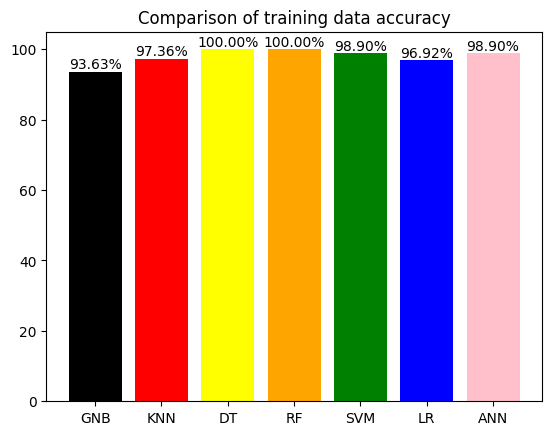

In [175]:
import matplotlib.pyplot as plt

acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
acc_train_percentages = [x * 100 for x in acc_train]

plt.title('Comparison of training data accuracy')
plt.bar(title, acc_train_percentages, color=colors)

for i, percentage in enumerate(acc_train_percentages):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')
    
plt.show()

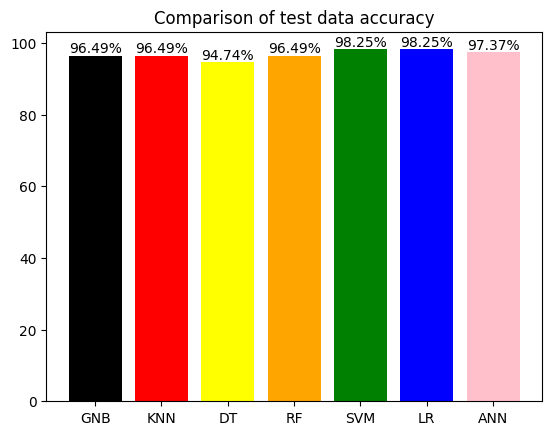

In [176]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
acc_test_percentages = [x * 100 for x in acc_test]

plt.title('Comparison of test data accuracy')
plt.bar(title, acc_test_percentages, color=colors)

for i, percentage in enumerate(acc_test_percentages):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

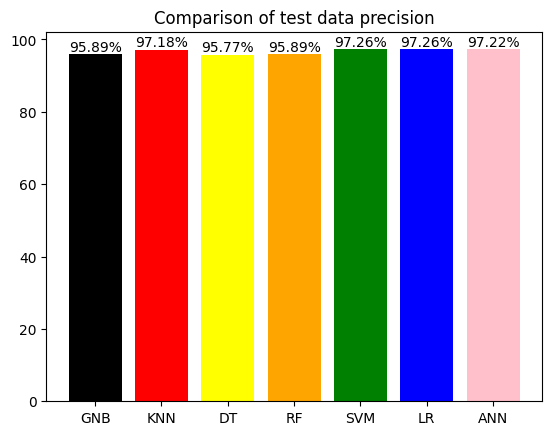

In [177]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
p_percentages = [x * 100 for x in p]

plt.title('Comparison of test data precision')
plt.bar(title, p_percentages, color=colors)

for i, percentage in enumerate(p_percentages):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')
    
plt.show()

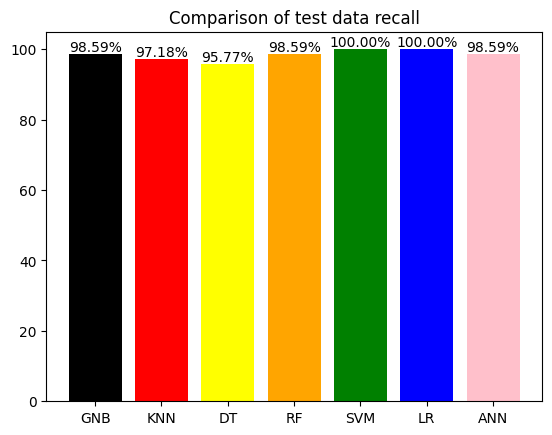

In [178]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
r_percentages = [x * 100 for x in r]

plt.title('Comparison of test data recall')
plt.bar(title, r_percentages, color=colors)

for i, percentage in enumerate(r_percentages):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()